## Plotting Calibration Plot for mulitple binary classifiers

What is a Calibartion Plot?
Calibration curves compare the predicted probability of the classifer to the observed probability. Calibration can help diagnose lack of fit. Calibration Plots should be used when not only the predicted label is of importance but the confidence with which model predict that label is also important.

In [11]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
import calibration_plot as cp

### Loading dataset for test

In [12]:
dataset = pd.read_csv("../../../datasets/eeg.csv")
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


### Tokenizing Labels for the dataste

In [13]:
factor = pd.factorize(dataset["Class"])
dataset.Class = factor[0]
definitions = factor[1]
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


### Dividing dataset in data and label

In [14]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

### Splitting data in training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)

In [16]:
warnings.filterwarnings("ignore", category=UserWarning)

### Creating 3 models for plotting Calibration Curves (Logistic Regression, Guassian NB, SVC)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
svc = SVC(max_iter=10000,probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Plotting all 3 models' Calibration Curves to see how close are predicted probablities are to true probablity

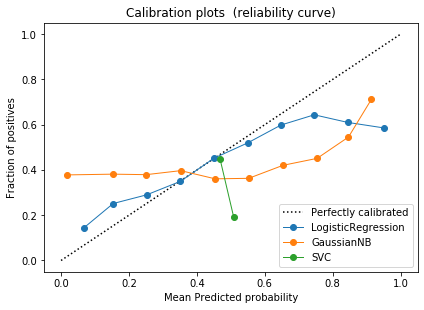

In [20]:
est = [lr, nb, svc]
name = ['LogisticRegression', 'GaussianNB', 'SVC']
cp.plot_calibration_curve(est, name, X_test, y_test)

### Intrepetation of above graph
- In the above 3 plots, SVC is performing the worst, all the predicted probablities can be binned in between 0.4-0.6, which shows how under-confident (or you can say indecisive) the model is.
- Guassian NB is far from the ideal prediction line, thus it is also not good in terms of its probablities being close the ideal probablities
- Logistic Regression model is better (not the best) among all three model as 5 points lies on or close to the ideal probablity plot
